# INTRODUCTION

## Statement of the problem

Eigen-portfolio construction using Principal Component Analysis (PCA)

In this assignment we look in-depth at model-free factor analysis using PCA. By model-free we mean that we do not rely on any factors such as value or momentum to decompose portfolio returns, but instead using Principal Component Analysis (PCA) to deduce structure of portfolio returns.

We are going to study the following indexes:
* **DJIA**: The Dow Jones Industrial Average (DJIA), or simply Dow Jones, is a stock market index that measures the stock performance of 30 large companies listed on stock exchanges in the United States. The value of the index is the sum of the price of one share of stock for each component company divided by a factor which changes whenever one of the component stocks has a stock split or stock dividend, so as to generate a consistent value for the index. The Industrial portion of the name is largely historical, as many of the modern 30 components have little or nothing to do with traditional heavy industry. The index is maintained by S&P Dow Jones Indices, a joint venture majority-owned by S&P Global and its components are selected by a committee.
* **S&P500**: The S&P 500 is a stock market index that comprises 505 common stocks issued by 500 large-cap companies and traded on American stock exchanges (including the 30 companies that compose the Dow Jones Industrial Average), and covers about 80 percent of the American equity market by capitalization. The index is weighted by free-float market capitalization, so more valuable companies account for relatively more of the index. The index constituents and the constituent weights are updated regularly using rules published by S&P Dow Jones Indices. Although the index is called the S&P 500, the index contains 505 stocks because it includes two share classes of stock from 5 of its component companies. The S&P 500 is maintained by S&P Dow Jones Indices, a joint venture majority-owned by S&P Global and its components are selected by a committee.
* **NASDAQ**: The NASDAQ Composite is a stock market index of the common stocks and similar securities listed on the Nasdaq stock market. Along with the Dow Jones Industrial Average and S&P 500 it is one of the three most-followed indices in US stock markets. The composition of the NASDAQ Composite is heavily weighted towards information technology companies.
* **EUROSTOCKXX50**: The EURO STOXX 50 is a stock index of Eurozone stocks designed by STOXX, an index provider owned by Deutsche Börse Group. It is made up of fifty of the largest and most liquid stocks. The index futures and options on the EURO STOXX 50, traded on Eurex, are among the most liquid products in Europe and the world.
* **IBEX35**: The *Índice Bursátil Español* (IBEX 35), literally Spanish Exchange Index, is the benchmark stock market index of the *Bolsa de Madrid*, Spain's principal stock exchange. It is a market capitalization weighted index comprising the 35 most liquid Spanish stocks traded in the Madrid Stock Exchange General Index and is reviewed twice annually. Initiated in 1992, the index is administered and calculated by *Sociedad de Bolsas*, a subsidiary of *Bolsas y Mercados Españoles* (BME), the company which runs Spain's securities markets (including the *Bolsa de Madrid*). 

## Libraries

In [99]:
# Basics
import pandas as pd
import numpy as np
import random
import logging

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.decomposition import PCA

## Data

In [127]:
def load_stocks(path):
    # Import the data
    df = pd.read_csv(path)

    # Put each stock in a column
    df = df.pivot(index = 'date', columns = 'Name', values = 'open')
    df = df.dropna(axis = 1)
    # Cast the index to datetime
    df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')

    # Delete annoying labels
    df.index.name = None
    df.columns.name = None

    return df

In [128]:
# load dataset
SP500_stocks = load_stocks('data/SP500_stocks_5yr.csv')
SP500_stocks.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,45.07,15.07,78.34,67.7142,36.37,46.52,34.39,73.01,38.31,44.72,...,28.03,37.00,88.50,42.66,32.08,27.01,63.70,75.02,24.03,32.31
2013-02-11,45.17,14.89,78.65,68.0714,36.13,46.85,34.42,73.09,38.99,45.99,...,28.25,37.46,88.35,42.87,31.92,27.11,65.16,75.75,24.14,33.06
2013-02-12,44.81,14.45,78.39,68.5014,35.77,46.70,34.27,72.89,38.55,46.15,...,28.27,37.35,88.25,42.82,32.04,27.52,64.58,75.65,24.28,33.40
2013-02-13,44.81,14.30,78.90,66.7442,35.42,46.74,34.29,73.32,38.90,46.29,...,28.38,37.63,88.46,42.89,31.96,28.00,64.77,75.74,24.58,33.80
2013-02-14,44.72,14.94,78.66,66.3599,35.05,46.67,34.28,73.21,38.70,46.02,...,28.39,37.61,88.34,42.89,31.84,28.22,64.27,75.86,24.68,33.39


## References

\[1\] Marco Avellaneda & Jeong-Hyun Lee (2010) *Statistical arbitrage in the US equities market*, Quantitative Finance, 10:7, 761-782, DOI: [10.1080/14697680903124632](https://www.tandfonline.com/doi/abs/10.1080/14697680903124632)

# EDA

In [166]:
def plot_stocks(df, index, k = 5, method = 'random', seed = 0):
    # Select k random stocks
    if method == 'first':
        stocks_to_plot = df.columns.tolist()[:k]
    elif method == 'random':
        random.seed(seed)
        stocks_to_plot = random.choices(df.columns.tolist(), k = k)

    # Make the layout
    n_cols = 5
    n_rows = k // n_cols + 1

    plt.figure(figsize = (20,5*n_rows))
    for i,stock in enumerate(stocks_to_plot):
        plt.subplot(n_rows, n_cols, i + 1)
        # Plot the stock
        sns.lineplot(x = df.index, y = df[stock])

        # Formatting
        plt.title('{} - {}'.format(index, stock))
        plt.xlabel('')
        plt.ylabel('Price per share')
        plt.xticks(rotation = 45)

    # Formatting
    plt.tight_layout()
    plt.show()

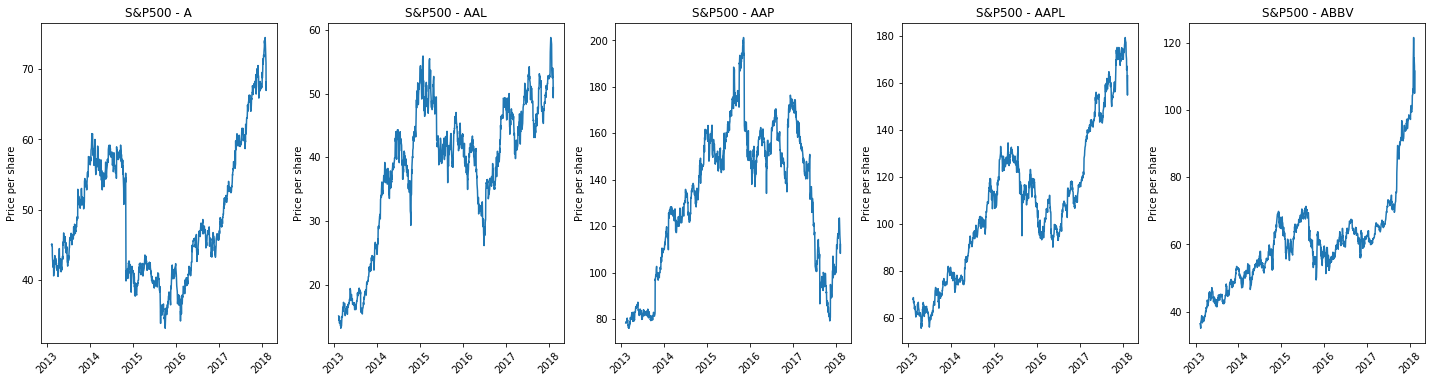

In [167]:
plot_stocks(SP500_stocks, index = 'S&P500', k = 5, method = 'first')

# MODELLING

## Computation of returns

It is a common practice not to analize the price series itself, but its normalized retuns. The returns are computed as the porcentual change in the price series, that is, if the price for an asset $i$ at time $t$ is given by $p_i^{t}$ then its return will be given by

$$ r_i^t = \frac{p_i^t - p_i^{t-1}}{p_i^{t-1}} $$

and it is also common to compute the log-returns, which are simply a logarithmic version of these returns

$$ r_i^t = \log \frac{p_i^t - p_i^{t-1}}{p_i^{t-1}} $$

which provide a smoother representation of the series.

In order to create a covariance matrix that can be used for the Principle Component Analysis, we need to normalize the returns, that is, to substract the mean $\mu_i$ of each return and divide the residual by the return's standard deviation $\sigma_i$, given by

\begin{align*}
    & \mu_i = \frac{1}{T} \sum_{t=1}^T r_i^t \\
    & \sigma_i^2 = \frac{1}{T} \sum_{t=1}^T (r_i^t - \mu_i)^2 \ 
\end{align*}

so we get

$$ r_i^t = \frac{r_i^t - \mu_i}{\sigma_i} $$

In [131]:
def compute_returns(df, normalize = True, log = False):
    '''
    Compute returns of a price time-series.

    Args:
        df: pd.DataFrame, the columns represent the price time-series and the index represent the dates 
        normalize: bool, indicates if normalize the time-series
        log: bool, indicates if apply a logarithm the time-series
    
    Returns:
        df: pd.DataFrame, the columns represent the return time-series and the index represent the dates 
    '''
    # Compute the returns
    df_returns = df.pct_change()

    # Normalize the returns if necessary
    if normalize == True:
        df_returns = (df_returns - df_returns.mean(skipna = True)) / df_returns.std(skipna = True)

    # Compute the logarithmic returns if necessary
    if log == True:
        df_returns = df_returns

    return df_returns

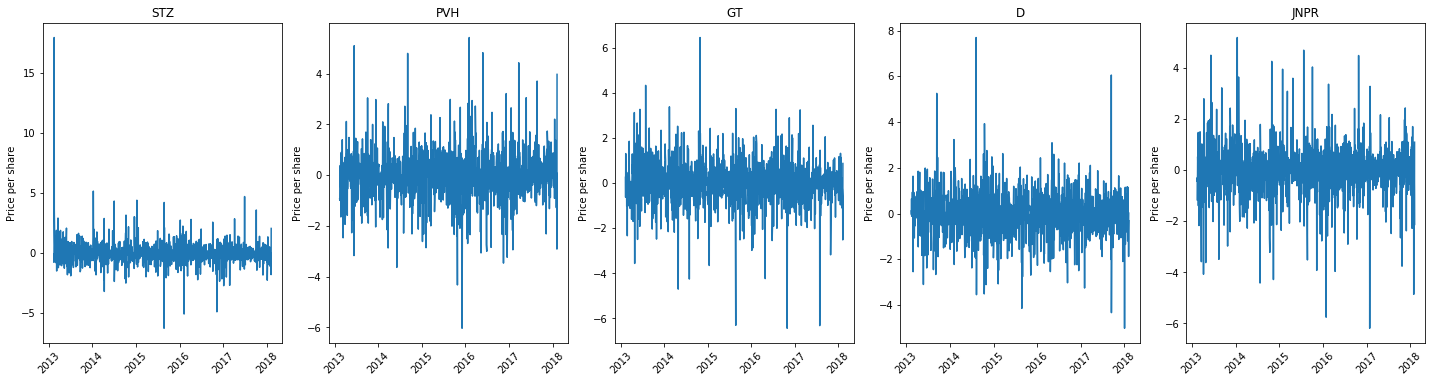

In [132]:
SP500_return = compute_returns(SP500_stocks, normalize = True)
plot_stocks(SP500_return)

## Creation of train and test sets

In [133]:
def train_test_split_ts(df, date_split):
    '''
    Split the time-series into a train test and a test set.

    Args:
        
    '''
    df_train = df[df.index <= date_split].copy()
    df_test  = df[df.index >  date_split].copy()

    return df_train, df_test

In [134]:
train_end = pd.to_datetime('2016-01-01', format = '%Y-%m-%d')

df_train = SP500_return[SP500_return.index <= train_end].copy()
df_test = SP500_return[SP500_return.index > train_end].copy()

Train dataset: (730, 468)
Test dataset: (529, 468)


## PCA fitting

#### Part 2 (PCA fitting)
Now we compute PCA using all available data. Once we do have PCA computed we fix variance explained at some number and see what is the smallest number of components needed to explain this variance.

**Instructions:**
- Calculate covariance matrix using training data set, i.e. **df_train** for all assets.  Assign results to **cov_matrix**.
- Use scikit-learn PCA to fit PCA model to **cov_matrix**. Assign fitted model to **pca**

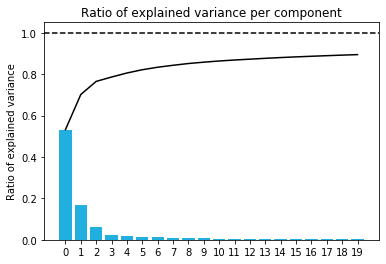

In [162]:
# Compute covariance matrix
cov_matrix = df_train.cov()

# Train PCA model
pca = PCA()
pca.fit(cov_matrix)

# Plot the variance explained by each stock
var_explained = pca.explained_variance_ratio_[:20]
var_explained_cum = np.cumsum(var_explained)

sns.barplot(x = np.arange(var_explained.shape[0]), y = var_explained,color='deepskyblue')
sns.lineplot(x = np.arange(var_explained.shape[0]), y = var_explained_cum,color='black')
plt.axhline(y = 1, linestyle = '--',color='black')
plt.title('Ratio of explained variance per component')
plt.xlabel('')
plt.ylabel('Ratio of explained variance')
plt.show()

## Eigen-portfolio construction

#### Part 3 (Eigen-portfolios construction)

**Instructions:**

We now look a the first two eigen portfolios. We use definition of eigen portfolios as provided by Avellaneda 
http://math.nyu.edu/faculty/avellane/AvellanedaLeeStatArb20090616.pdf

Following Avellaneda we define eigen portfolio weights as:
$$Q_i^{(j)} = \frac{v_i^{(j)}}{\sigma_i}$$

where $j$ is the index of eigen portfolio and $v_i$ is the i-th element of j-th eigen vector.

In the code the pca.components_ are the Principal axes in feature space, representing the directions of maximum variance in the data. The components are sorted by explained_variance_.

**Hint:** do not forget to normalize portfolio wieghts such they sum up to 1.

Assign **pc_w** to be weights of the first eigen portfolio.

In [171]:
def eigenportfolios_from_pca(df, pca):

    # Obtain the eigenportfolios
    eigenportfolios = pca.components_

    # Normalize them
    eigenportfolios = eigenportfolios / np.sum(eigenportfolios, axis = 0)

    # Convert to DataFrame to 
    eigenportfolios = pd.DataFrame(eigenportfolios, columns = range(eigenportfolios.shape[0]), index = df.columns.tolist())
    
    return eigenportfolios

(468,)

In [ ]:
def plot_portfolio(df, n = 0):
    df = df.sort_values(by = n, ascending = False)[n]

Sum of weights of first eigen-portfolio: 100.00


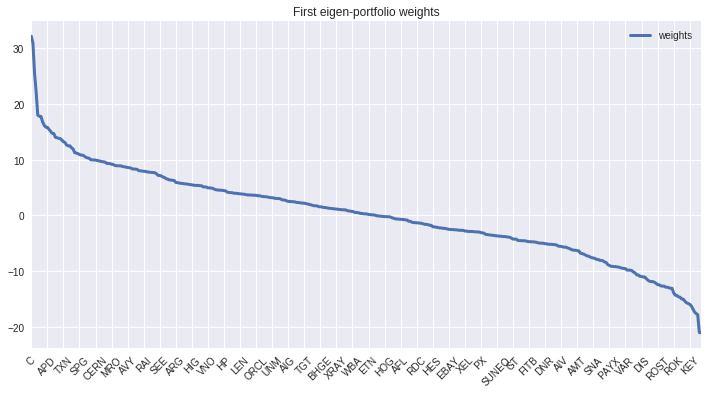

In [107]:
# the first two eigen-portfolio weights# the fi 
# first component
# get the Principal components
pc_w = np.zeros(len(stock_tickers))
eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
if pca is not None:
    pcs = pca.components_

    ### START CODE HERE ### (≈ 1-2 lines of code)
    # normalized to 1 
    pc_w = pcs[:,0] / pcs[:,0].sum()
    
    ### END CODE HERE ###
    
    eigen_prtf1 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
    eigen_prtf1.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of first eigen-portfolio: %.2f' % np.sum(eigen_prtf1))
    eigen_prtf1.plot(title='First eigen-portfolio weights', 
                     figsize=(12,6), 
                     xticks=range(0, len(stock_tickers),10), 
                     rot=45, 
                     linewidth=3)

We sort the first two eigen portfolio weights and plot the results.

Sum of weights of second eigen-portfolio: 100.00


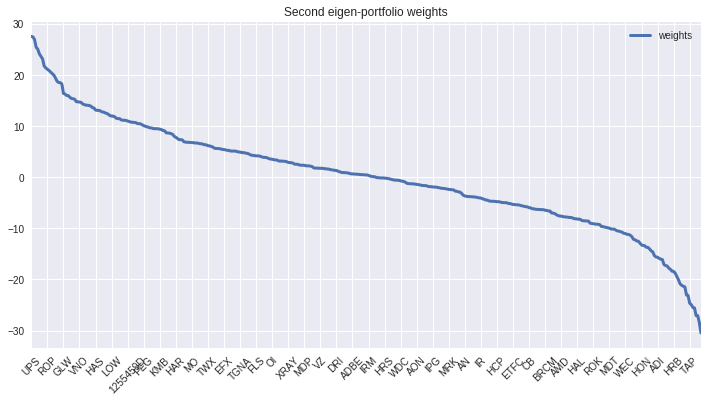

In [109]:
pc_w = np.zeros(len(stock_tickers))
eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)

if pca is not None:
    pcs = pca.components_
    
    ### START CODE HERE ### (≈ 1-2 lines of code)
    # normalized to 1 
    pc_w = pcs[:,1] / pcs[:,1].sum()
    
    ### END CODE HERE ###

    eigen_prtf2 = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
    eigen_prtf2.sort_values(by=['weights'], ascending=False, inplace=True)
    print('Sum of weights of second eigen-portfolio: %.2f' % np.sum(eigen_prtf2))
    eigen_prtf2.plot(title='Second eigen-portfolio weights',
                     figsize=(12,6), 
                     xticks=range(0, len(stock_tickers),10), 
                     rot=45, 
                     linewidth=3)

## Compute performance

#### Part 4 (Compute performance of several eigen portfolios)

**Instructions:**
- Implement sharpe_ratio() function. The function takes ts_returns argument of type pd.Series and returns a tuple of annualized return, annualized vol, and annualized sharpe ratio, where sharpe ratio is defined as annualized return divided by annualized volatility 
- find portfolio (an index into sharpe_metric) that has the highest sharpe ratio

In [111]:
def sharpe_ratio(ts_returns, periods_per_year=252):
    """
    sharpe_ratio - Calculates annualized return, annualized vol, and annualized sharpe ratio, 
                    where sharpe ratio is defined as annualized return divided by annualized volatility 
                    
    Arguments:
    ts_returns - pd.Series of returns of a single eigen portfolio
    
    Return:
    a tuple of three doubles: annualized return, volatility, and sharpe ratio
    """
    
    annualized_return = 0.
    annualized_vol = 0.
    annualized_sharpe = 0.
    
    ### START CODE HERE ### (≈ 4-5 lines of code)
    n_years = ts_returns.shape[0] / periods_per_year
    annualized_return = np.power(np.prod(1 + ts_returns),(1 / n_years)) - 1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    ### END CODE HERE ###
    
    return annualized_return, annualized_vol, annualized_sharpe

We compute the annualized return, volatility, and Sharpe ratio of the first two eigen portfolios.

First eigen-portfolio:
Return = 41.39%
Volatility = 31.50%
Sharpe = 1.31


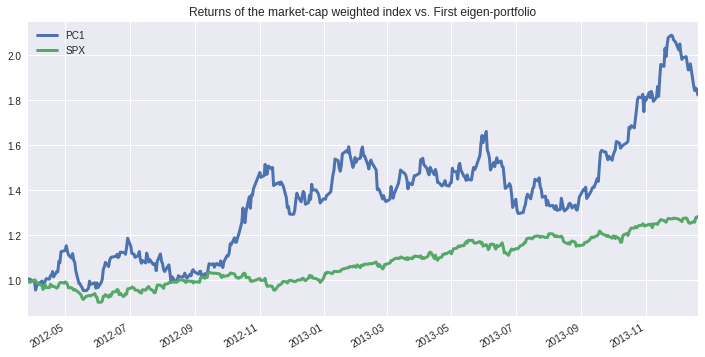

In [112]:
if df_raw_test is not None:
    eigen_prtf1_returns = np.dot(df_raw_test.loc[:, eigen_prtf1.index], eigen_prtf1 / 100)
    eigen_prtf1_returns = pd.Series(eigen_prtf1_returns.squeeze(), index=df_test.index)
    er, vol, sharpe = sharpe_ratio(eigen_prtf1_returns)
    print('First eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))
    year_frac = (eigen_prtf1_returns.index[-1] - eigen_prtf1_returns.index[0]).days / 252

    df_plot = pd.DataFrame({'PC1': eigen_prtf1_returns, 'SPX': df_raw_test.loc[:, 'SPX']}, index=df_test.index)
    np.cumprod(df_plot + 1).plot(title='Returns of the market-cap weighted index vs. First eigen-portfolio', 
                             figsize=(12,6), linewidth=3)

In [113]:
if df_raw_test is not None:
    eigen_prtf2_returns = np.dot(df_raw_test.loc[:, eigen_prtf2.index], eigen_prtf2 / 100)
    eigen_prtf2_returns = pd.Series(eigen_prtf2_returns.squeeze(), index=df_test.index)
    er, vol, sharpe = sharpe_ratio(eigen_prtf2_returns)
    print('Second eigen-portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f' % (er*100, vol*100, sharpe))

Second eigen-portfolio:
Return = 15.76%
Volatility = 42.84%
Sharpe = 0.37


We repeat the exercise of computing Sharpe ratio for the first N portfolios and select portfolio with the highest postive Sharpe ratio.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in power


Eigen portfolio #42 with the highest Sharpe. Return 61.14%, vol = 22.80%, Sharpe = 2.68


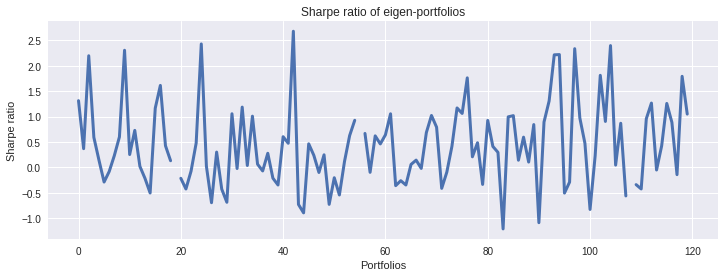

In [118]:
n_portfolios = 120
annualized_ret = np.array([0.] * n_portfolios)
sharpe_metric = np.array([0.] * n_portfolios)
annualized_vol = np.array([0.] * n_portfolios)
idx_highest_sharpe = 0 # index into sharpe_metric which identifies a portfolio with rhe highest Sharpe ratio
    
if pca is not None:
    for ix in range(n_portfolios):
        
        ### START CODE HERE ### (≈ 4-5 lines of code)
        pc_w = pcs[:, ix] / sum(pcs[:, ix])
        eigen_prtfix = pd.DataFrame(data ={'weights': pc_w.squeeze()*100}, index = stock_tickers)
        eigen_prtfix.sort_values(by=['weights'], ascending=False, inplace=True)
        eigen_prtix_returns = np.dot(df_raw_test.loc[:, eigen_prtfix.index], eigen_prtfix / 100)
        eigen_prtix_returns = pd.Series(eigen_prtix_returns.squeeze(), index=df_test.index)
        er, vol, sharpe = sharpe_ratio(eigen_prtix_returns)
        annualized_ret[ix] = er
        annualized_vol[ix] = vol
        sharpe_metric[ix] = sharpe
        ### END CODE HERE ###
    
    
    # find portfolio with the highest Sharpe ratio
    ### START CODE HERE ### (≈ 2-3 lines of code)
    idx_highest_sharpe = np.nanargmax(sharpe_metric)
    
    ### END CODE HERE ###
    
    print('Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f' % 
          (idx_highest_sharpe,
           annualized_ret[idx_highest_sharpe]*100, 
           annualized_vol[idx_highest_sharpe]*100, 
           sharpe_metric[idx_highest_sharpe]))

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric, linewidth=3)
    ax.set_title('Sharpe ratio of eigen-portfolios')
    ax.set_ylabel('Sharpe ratio')
    ax.set_xlabel('Portfolios')

In [122]:
results = pd.DataFrame(data={'Return': annualized_ret, 'Vol': annualized_vol, 'Sharpe': sharpe_metric})
results.dropna(inplace=True)
results.sort_values(by=['Sharpe'], ascending=False, inplace=True)
results.head(10)

,Return,Sharpe,Vol
42,0.611437,2.681354,0.228033
24,1.032178,2.431344,0.424530
104,0.512464,2.398724,0.213640
97,1.425562,2.337929,0.609754
9,0.753548,2.306601,0.326692
94,0.502025,2.221589,0.225976
93,0.601081,2.216774,0.271151
2,0.453437,2.198512,0.206247
102,0.274142,1.813008,0.151208
118,0.874381,1.793422,0.487549
